<h1> Processing and Visualisation of results </h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [3]:
hto_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Bachelor-Thesis/demultiplex-pipeline/results/results.csv")

In [4]:
hto_results.columns = ["hashtag","classification"]

In [5]:
hto_results.head()

,hashtag,classification
0,AGGCCACAGCGTCTAT,Singlet
1,ATTGGTGAGTTCGCAT,Doublet
2,GTGCAGCTCAGTCCCT,Singlet
3,TAGTTGGGTCATACTG,Singlet
4,TTCTTAGAGAAGGCCT,Singlet


In [6]:
htoDemul = hto_results['classification'].value_counts()

In [7]:
htoDemul_dict = htoDemul.to_dict()


In [8]:
htoDemul_dict['Algorithm'] = "HTODemul"
htoDemul_dict

{'Singlet': 13900, 'Doublet': 2433, 'Negative': 583, 'Algorithm': 'HTODemul'}

In [9]:
multi_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Bachelor-Thesis/demultiplex-pipeline/results/multiseq-result.csv")

In [10]:
multi_results.columns = ["hashtag","classification"]

In [11]:
multi_results

,hashtag,classification
0,AGGCCACAGCGTCTAT,HTO-H
1,ATTGGTGAGTTCGCAT,Doublet
2,GTGCAGCTCAGTCCCT,HTO-H
3,TAGTTGGGTCATACTG,HTO-H
4,TTCTTAGAGAAGGCCT,HTO-D
...,...,...
16911,AGCGTCGAGTGGGATC,Doublet
16912,AACACGTGTAGCCTCG,Doublet
16913,AGCGTCGAGGGCTTCC,Doublet
16914,GTCGGGTAGCATGGCA,Doublet


In [12]:
multiseq = multi_results['classification'].value_counts()

In [13]:
multiseq

Doublet    5633
HTO-D      1703
HTO-B      1668
HTO-G      1572
HTO-H      1434
HTO-E      1268
HTO-C      1253
HTO-F      1235
HTO-A      1150
Name: classification, dtype: int64

In [14]:
multiseq_res_dict = multiseq.to_dict()

In [15]:
multiseq_res_dict 

{'Doublet': 5633,
 'HTO-D': 1703,
 'HTO-B': 1668,
 'HTO-G': 1572,
 'HTO-H': 1434,
 'HTO-E': 1268,
 'HTO-C': 1253,
 'HTO-F': 1235,
 'HTO-A': 1150}

In [16]:
multi_singlets = np.sum(value for key, value in multiseq_res_dict.items() if key != 'Doublet')

/var/folders/10/sfmvfl9139b7z3wwbq1j88gr0000gn/T/ipykernel_11672/599037296.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  multi_singlets = np.sum(value for key, value in multiseq_res_dict.items() if key != 'Doublet')


In [17]:
multiseq_dict = dict()
multiseq_dict['Singlet'] = multi_singlets

In [18]:
multiseq_dict['Doublet'] = multiseq_res_dict['Doublet']

In [19]:
multiseq_dict['Negative'] = 0

In [20]:
multiseq_dict['Algorithm'] = "MULTI-Seq"

In [21]:
hashed_drops = pd.read_csv('/Users/mylenemarianagonzalesandre/Development/Bachelor-Thesis/demultiplex-pipeline/results/HD_results.csv')
hashed_drops.head()

,Unnamed: 0,Total,Best,Second,LogFC,LogFC2,Doublet,Confident
0,AGGCCACAGCGTCTAT,4200,8,5,8.490503,0.580016,False,True
1,ATTGGTGAGTTCGCAT,3475,7,8,1.108589,4.124493,True,False
2,GTGCAGCTCAGTCCCT,1211,8,3,4.443640,1.908259,False,True
3,TAGTTGGGTCATACTG,955,8,4,4.728427,0.766317,False,True
4,TTCTTAGAGAAGGCCT,1912,4,2,5.561770,0.973143,False,True


In [22]:
#Confident = Singlet
#Doublet -> True
#Comparar las columnas buscando negativos para encontrar negativos
#simplemente resta el total entre estos 2 del total total y tienes los negativos
drops_count_singlets = hashed_drops['Confident'].value_counts()
drops_count_doublets = hashed_drops['Doublet'].value_counts()


In [23]:
drops_count_singlets

True     14105
False     2811
Name: Confident, dtype: int64

In [25]:
drops_count_doublets


False    14442
True      2474
Name: Doublet, dtype: int64

In [26]:
drops_count_singlets.to_dict()
drops_count_doublets.to_dict()

{False: 14442, True: 2474}

In [28]:
total_objects = hashed_drops['Doublet'].str.len()
total_objects

AttributeError: Can only use .str accessor with string values!

In [20]:
dd = defaultdict(list)
for d in (htoDemul_dict, multiseq_dict): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print(dd)

defaultdict(<class 'list'>, {'Singlet': [13900, 11283], 'Doublet': [2433, 5633], 'Negative': [583, 0], 'Algorithm': ['HTODemul', 'MULTI-Seq']})


In [21]:
dict(dd)

{'Singlet': [13900, 11283],
 'Doublet': [2433, 5633],
 'Negative': [583, 0],
 'Algorithm': ['HTODemul', 'MULTI-Seq']}

In [41]:
bool(dict(dd))

True

In [22]:
dfObj = pd.DataFrame(dict(dd))

In [43]:
dfObj

,Singlet,Doublet,Negative,Algorithm
0,13900,2433,583,HTODemul
1,11283,5633,0,MULTI-Seq


<AxesSubplot:title={'center':'Hashing Demultiplexing per algorithm'}, xlabel='Algorithm'>

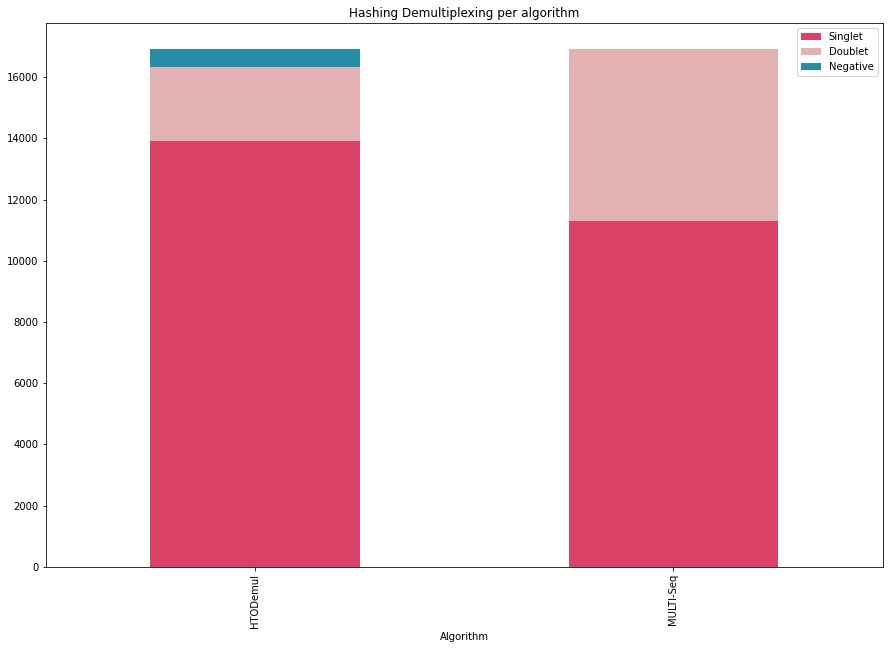

In [44]:
dfObj.plot.bar(x='Algorithm', stacked=True,color=["#DA4167","#E2B1B1","#258EA6"], title='Hashing Demultiplexing per algorithm',figsize=(15, 10))
